Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 192)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 96)           18528     ['input_1[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 28, 28, 16)           3088      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 28, 28, 192)          0         ['input_1[0][0]']             
 D)                                                                                           

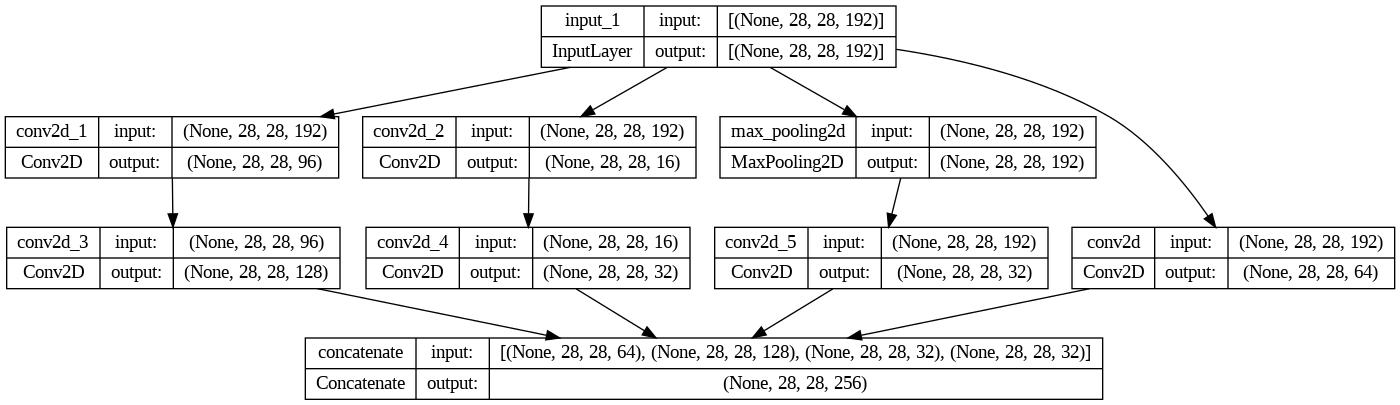

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

main_input = Input(shape=(28,28,192))
# 그림에서 28*28*64
# 64개 특징, 28*28이 변하지 않았으므로 패딩 same을 줘야함
conv11 = Conv2D(64, (1,1), padding='same') (main_input)

conv11_33 = Conv2D(96, (1,1), padding='same') (main_input)
conv11_55 = Conv2D(16, (1,1), padding='same') (main_input)
maxpooling = MaxPooling2D((3,3), strides=1, padding='same') (main_input)

conv33 = Conv2D(128, (3,3), padding='same') (conv11_33)
conv55 = Conv2D(32, (5,5), padding='same') (conv11_55)
conv11_maxp = Conv2D(32, (1, 1), padding='same') (maxpooling)

main_output = Concatenate() ([conv11, conv33, conv55, conv11_maxp])

# 모델 구성 (입력값들과 출력값들)
model = Model(inputs=[main_input], outputs=[main_output])
model.summary()

# 출력
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.jpg', show_shapes=True)